**Nombre: Priscila Elías**

## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos. 
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

**Desarrollo**

In [ ]:
#Aplicamos el modelo de clustering con métricas de distancia.

In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import contingency_matrix
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UCamp/costumers.csv')
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


**Determinar el número máximo de clusters y aplicar PCA**

In [ ]:
#Se determina el número máximo de clusters y se aplica PCA para bajar la dimensionalidad, pasar de 5 a 2 dimensiones.
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Establecemos el PCA de 2 componentes
df1 = pca.fit_transform(df)  # Lo aplicamos a nuestro dataset codificado
pca.explained_variance_ratio_.cumsum() # Calculamos las varianzas acumuladas explicadas

array([0.95543853, 0.99999998])

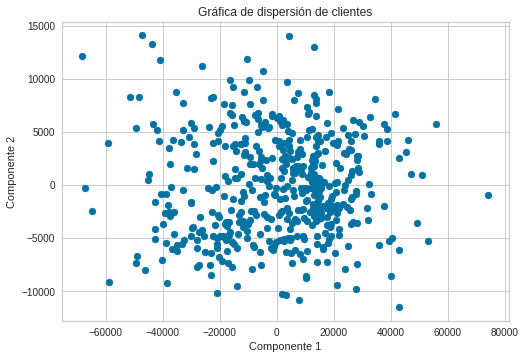

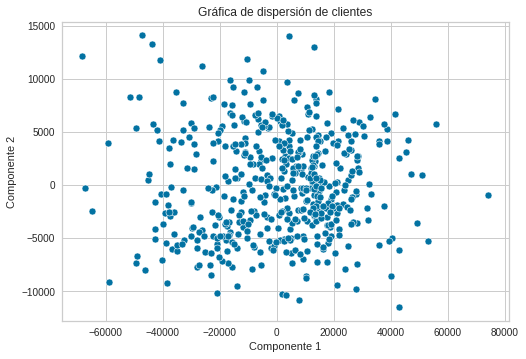

In [ ]:
# Dispersion de Clientes
# Grafica con Pyplot
df1_feature1 = df1[:,0]
df1_feature2 = df1[:,1]
plt.scatter(df1_feature1, df1_feature2)
plt.title('Gráfica de dispersión de clientes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

# Grafica con Seaborn
pc1_values = df1[:,0]
pc2_values = df1[:,1]
plt.title('Gráfica de dispersión de clientes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
sns.scatterplot(x=pc1_values, y=pc2_values)

**Hacer el diagrama de codo**

In [ ]:
#Visualizamos los valores representativos del df
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [ ]:
#Selecionamos los datos para el aprendizaje automatico
X = df.iloc[:, 0:5].values

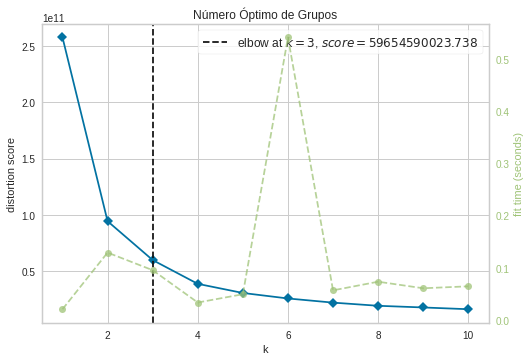

In [ ]:
# Iniciamos el modelo y el visualizador
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11), title = "Número Óptimo de Grupos" )

visualizer.fit(X) # Hacemos fit a los datos en el visualizador
visualizer.show() # Renderizamos la figura y la mostramos

# Aqui presentamos la Gráfica de visualización de agrupación de clientes
# donde la X representa K que es el Número de grupos óptimos
# y Y representa el error de agrupamiento o similitud de los clientes dentro de los grupos.

En esta gráfica, el punto de inflexión (el codo) se encuentra alrededor del valor de k = 3 puesto que el error disminuye en este punto. Esto significa que 3 grupos es el número óptimo de grupos para este conjunto de datos de clientes.

**Seleccionar y entrenar modelo**

In [ ]:
# Seleccionaremos el modelo de Clustering KNN 
# para clasificar la agrupacion de datos basado en los datos de sus vecinos.
# Usaremos 3 clusters dado el numero de grupos optimos de la grafica del codo.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df1)
labels = kmeans.labels_

#El modelo entrenado sera y_kmeans

In [ ]:
#Luego de entrenarlo, veamos los valores resultantes
y_kmeans

array([0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2,
       1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2,
       0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2,
       0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0,

In [ ]:
#veamos cuantos resulados se generaron por cada cluster

np.unique(y_kmeans, return_counts= True)

(array([0, 1, 2], dtype=int32), array([191, 215,  94]))

**Generar la visualización de datos con un diseño personalizado**

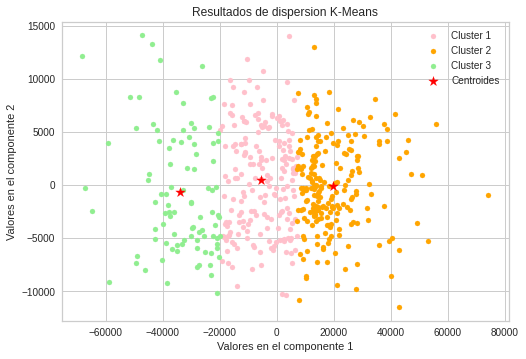

In [ ]:
#realizamos el grafico de dispersion de K-means, donde vemos un grupo diferente llamados cluster 1, 2 y 3.

plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0, 1], s = 100, marker= '.', c = "pink", label = "Cluster 1")
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1, 1], s = 100, marker= '.', c = "orange", label = "Cluster 2")
plt.scatter(df1[y_kmeans == 2, 0], df1[y_kmeans == 2, 1], s = 100, marker= '.', c = "lightgreen", label = "Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, marker= '*', c = "red", label = "Centroides")
plt.title("Resultados de dispersion K-Means")
plt.xlabel("Valores en el componente 1")
plt.ylabel("Valores en el componente 2")
plt.legend()
plt.show()

**Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos.**

In [ ]:
# Usamos una de la métricas de evaluación de agrupamiento más utilizada, 
# el coeficiente de silhouette realizando la comparación de la distancia
# Importamos las bibliotecas
from sklearn import metrics
from sklearn.metrics import silhouette_score

s_score = silhouette_score(df1, labels, metric='euclidean')
print(f'El coeficiente de silueta es de {s_score}.')



El coeficiente de silueta es de 0.4492136887086693.


Un valor cercano a 1 indica un resultado de agrupación excelente, en la que las distancias entre grupos son mucho mayores que las distancias dentro de los grupos; mientras que un valor cercano a -1 significa una asignación de clúster totalmente incorrecta, en la que las distancias entre clústeres ni siquiera son comparables con las distancias dentro de los clústeres.


In [ ]:
# Generamos los scores con ayuda de scikit-learn
Silueta = metrics.silhouette_score(df1, labels)
Calinski_Harabasz = metrics.calinski_harabasz_score(df1, labels)
Davies_Bouldin = metrics.davies_bouldin_score(df1, labels)

In [ ]:
# Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)

Score Analísis de silueta:  0.4492136887086693
Score indice Calinski-Harabasz :  825.2218813936208
Score indice Davies-Bouldin:  0.7016102858446226


Podemos decir que la agrupación y separación de nuestro modelo de clustering son buenas debido a que los resultados anteriores muestran que el algoritmo K-Means tuvo un buen desempeño para agrupar los datos. 

El puntaje de análisis de silueta fue de 0.4492 el cual tiende a 1, lo que indica una buena agrupación. El puntaje de índice Calinski-Harabasz fue de 825.22, lo que indica una buena separación entre si de los grupos. El puntaje de índice Davies-Bouldin fue de 0.7016, lo que indica una buena separación entre los grupos. Los resultados indican que el algoritmo K-Means fue capaz de encontrar patrones en los datos.


La agrupacion de clientes en 3 grupos y su respectiva evaluación, nos ayudan a indicar que el agrupamiento, definición y la similitud que tienen entre ellos son los patrones adecuados para realizar propuestas de nuevos productos a los clientes.

**Punto extra 1**

In [ ]:
#Punto extra
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfnew = pd.read_csv('/content/drive/MyDrive/UCamp/new_costumer.csv')
dfnew.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,50.0,13232.1144,5767.078320,-638.96,9783.8875,12849.835,16788.6725,23890.65
Credito_tipo_1,50.0,0.5200,0.504672,0.00,0.0000,1.000,1.0000,1.00
Credito_tipo_2,50.0,0.5000,0.505076,0.00,0.0000,0.500,1.0000,1.00
Limite_TC,50.0,38422.6698,20240.655015,-2756.45,22922.6175,39054.305,52052.3200,83578.93
Tiempo_cliente,50.0,2.9440,3.973338,0.00,0.0000,0.000,6.3500,11.30
Producto_ofrecido,50.0,0.7000,0.462910,0.00,0.0000,1.000,1.0000,1.00
Tipo_de_cliente,50.0,1.3800,1.122861,0.00,0.0000,1.000,2.0000,3.00


In [ ]:
#Se determina el número máximo de clusters y se aplica PCA para bajar la dimensionalidad, pasar de 6 a 2 dimensiones.
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Establecemos el PCA de 2 componentes
dfnew1 = pca.fit_transform(dfnew)  # Lo aplicamos a nuestro dataset codificado
pca.explained_variance_ratio_.cumsum() # Calculamos las varianzas acumuladas explicadas

array([0.95222838, 0.99999997])

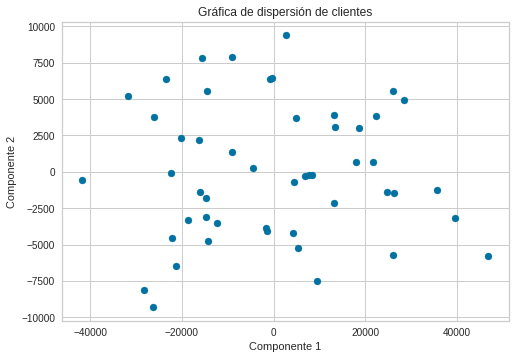

In [ ]:
# Dispersion de Clientes
# Grafica con Pyplot
data1_feature1 = dfnew1[:,0]
data1_feature2 = dfnew1[:,1]
plt.scatter(data1_feature1, data1_feature2)
plt.title('Gráfica de dispersión de clientes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [ ]:
#Selecionamos los datos para el aprendizaje automatico
Xnew = dfnew.iloc[:, 0:6].values

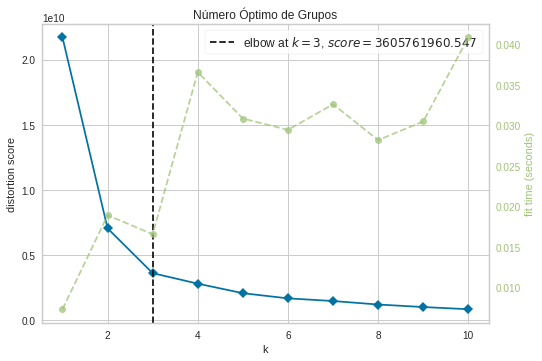

In [ ]:
# Iniciamos el modelo y el visualizador
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11), title = "Número Óptimo de Grupos" )

visualizer.fit(Xnew) # Hacemos fit a los datos en el visualizador
#visualizer.ax.set_xlabel("Número de grupos óptimos", fontsize=14)
visualizer.show() # Renderizamos la figura y la mostramos

In [ ]:
# Usaremos 3 clusters dado el numero de grupos optimos de la grafica del codo.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
ynew_kmeans = kmeans.fit_predict(dfnew1)
labelsnew = kmeans.labels_

In [ ]:
#Luego de entrenarlo, veamos los valores resultantes
ynew_kmeans

array([0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1,
       0, 1, 0, 2, 2, 2], dtype=int32)

In [ ]:
#veamos cuantos resulados se generaron por cada cluster
np.unique(ynew_kmeans, return_counts= True)

(array([0, 1, 2], dtype=int32), array([21, 12, 17]))

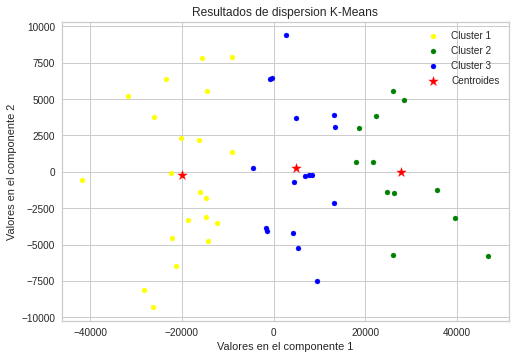

In [ ]:
#realizamos el grafico de dispersion de K-means, donde vemos un grupo diferente llamados cluster 1, 2 y 3.
plt.scatter(dfnew1[ynew_kmeans == 0, 0], dfnew1[ynew_kmeans == 0, 1], s = 100, marker= '.', c = "yellow", label = "Cluster 1")
plt.scatter(dfnew1[ynew_kmeans == 1, 0], dfnew1[ynew_kmeans == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 2")
plt.scatter(dfnew1[ynew_kmeans == 2, 0], dfnew1[ynew_kmeans == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, marker= '*', c = "red", label = "Centroides")
plt.title("Resultados de dispersion K-Means")
plt.xlabel("Valores en el componente 1")
plt.ylabel("Valores en el componente 2")
plt.legend()
plt.show()

In [ ]:
# Usamos una de la métricas de evaluación de agrupamiento más utilizada, 
# el coeficiente de silhouette realizando la comparación de la distancia
# Importamos las bibliotecas
from sklearn import metrics
from sklearn.metrics import silhouette_score

s_score = silhouette_score(dfnew1, labelsnew, metric='euclidean')
print(f'El coeficiente de silueta es de {s_score}.')


El coeficiente de silueta es de 0.5178446369063634.


El puntaje de análisis de silueta fue de 0.5178 el cual tiende a 1, lo que indica una buena agrupación.

In [ ]:
# Generamos los scores con ayuda de scikit-learn
Silueta = metrics.silhouette_score(dfnew1, labelsnew)
Calinski_Harabasz = metrics.calinski_harabasz_score(dfnew1, labelsnew)
Davies_Bouldin = metrics.davies_bouldin_score(dfnew1, labelsnew)

In [ ]:
# Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)

Score Analísis de silueta:  0.5178446369063634
Score indice Calinski-Harabasz :  117.95395740959447
Score indice Davies-Bouldin:  0.6109164242500865


**Punto extra 2**

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/UCamp/costumers.csv')
data2 = pd.read_csv('/content/drive/MyDrive/UCamp/new_costumer.csv')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


In [ ]:
data_result = data1.append(data2)

In [ ]:
data_result.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,22572.91,1,0,30136.74,0.0,1,NaN
1,10609.64,1,1,53623.94,0.0,1,NaN
2,10079.48,0,1,18135.44,0.0,0,NaN
3,13871.35,1,0,30831.75,0.0,1,NaN
4,6541.46,0,1,20626.23,0.0,0,NaN


In [ ]:
print(data_result)

     Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
0   22572.91               1               0   30136.74             0.0   
1   10609.64               1               1   53623.94             0.0   
2   10079.48               0               1   18135.44             0.0   
3   13871.35               1               0   30831.75             0.0   
4    6541.46               0               1   20626.23             0.0   
..       ...             ...             ...        ...             ...   
45   -638.96               1               1   83578.93             5.6   
46  11022.47               0               1   23592.14             0.0   
47   8384.00               0               1   41851.53             9.3   
48  13924.97               0               1   52062.57             7.8   
49  19648.87               1               0   39274.59             0.0   

    Producto_ofrecido  Tipo_de_cliente  
0                   1              NaN  
1                

In [ ]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            550 non-null    float64
 1   Credito_tipo_1     550 non-null    int64  
 2   Credito_tipo_2     550 non-null    int64  
 3   Limite_TC          550 non-null    float64
 4   Tiempo_cliente     550 non-null    float64
 5   Producto_ofrecido  550 non-null    int64  
 6   Tipo_de_cliente    50 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 34.4 KB


In [ ]:
data_result.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,550.0,12193.008018,5190.187143,-2911.65,8611.9825,11570.87,15323.3250,30041.40
Credito_tipo_1,550.0,0.601818,0.489969,0.00,0.0000,1.00,1.0000,1.00
Credito_tipo_2,550.0,0.461818,0.498994,0.00,0.0000,0.00,1.0000,1.00
Limite_TC,550.0,44206.201764,22042.981836,-22207.95,29271.3275,47173.74,58972.0175,118636.82
Tiempo_cliente,550.0,4.201273,4.730375,0.00,0.0000,0.00,8.2000,19.30
Producto_ofrecido,550.0,0.610909,0.487988,0.00,0.0000,1.00,1.0000,1.00
Tipo_de_cliente,50.0,1.380000,1.122861,0.00,0.0000,1.00,2.0000,3.00


In [ ]:
completitud = pd.DataFrame(data_result.isnull().sum())
completitud

,0
Salario,0
Credito_tipo_1,0
Credito_tipo_2,0
Limite_TC,0
Tiempo_cliente,0
Producto_ofrecido,0
Tipo_de_cliente,500


In [ ]:
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud

,total
Salario,0
Credito_tipo_1,0
Credito_tipo_2,0
Limite_TC,0
Tiempo_cliente,0
Producto_ofrecido,0
Tipo_de_cliente,500


In [ ]:
completitud["completitud"] = (1 - completitud["total"] / data_result.shape[0] * 100)
completitud

,total,completitud
Salario,0,1.000000
Credito_tipo_1,0,1.000000
Credito_tipo_2,0,1.000000
Limite_TC,0,1.000000
Tiempo_cliente,0,1.000000
Producto_ofrecido,0,1.000000
Tipo_de_cliente,500,-89.909091


In [ ]:
#Se puede realizar eliminacion por index
print(completitud.index)

Index(['Salario', 'Credito_tipo_1', 'Credito_tipo_2', 'Limite_TC',
       'Tiempo_cliente', 'Producto_ofrecido', 'Tipo_de_cliente'],
      dtype='object')


In [ ]:
#Puesto que la variable Tipo_de_cliente tiene de completitud un valor negativo el cual aporta menos informacion, 
#razon por la que se retira la columna de la muestra
data_clean = data_result.iloc[:,[0, 1, 2, 3, 4, 5]]

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            550 non-null    float64
 1   Credito_tipo_1     550 non-null    int64  
 2   Credito_tipo_2     550 non-null    int64  
 3   Limite_TC          550 non-null    float64
 4   Tiempo_cliente     550 non-null    float64
 5   Producto_ofrecido  550 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 30.1 KB


In [ ]:
#Se determina el número máximo de clusters y se aplica PCA para bajar la dimensionalidad, pasar de 6 a 2 dimensiones.
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Establecemos el PCA de 2 componentes
data_clean1 = pca.fit_transform(data_clean)  # Lo aplicamos a nuestro dataset codificado
pca.explained_variance_ratio_.cumsum() # Calculamos las varianzas acumuladas explicadas

array([0.95489764, 0.99999998])

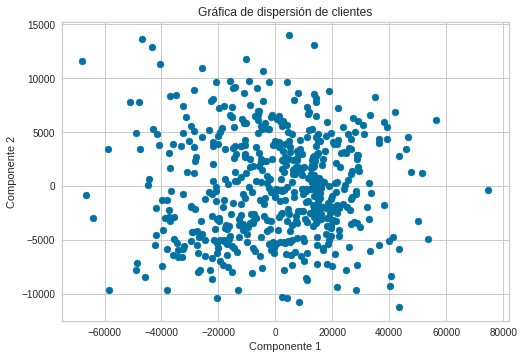

In [ ]:
# Dispersion de Clientes
# Grafica con Pyplot
data_clean1_feature1 = data_clean1[:,0]
data_clean1_feature2 = data_clean1[:,1]
plt.scatter(data_clean1_feature1, data_clean1_feature2)
plt.title('Gráfica de dispersión de clientes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [ ]:
#Selecionamos los datos para el aprendizaje automatico
Xdata = data_clean.iloc[:, 0:5].values

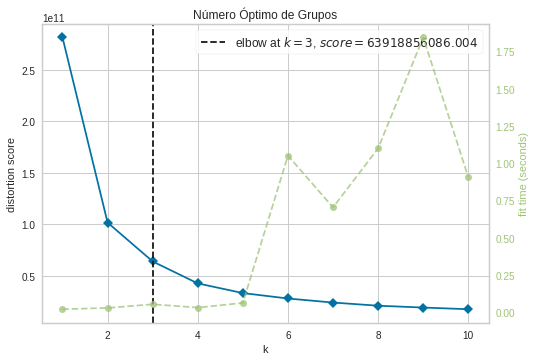

In [ ]:
# Iniciamos el modelo y el visualizador
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11), title = "Número Óptimo de Grupos" )

visualizer.fit(Xdata) # Hacemos fit a los datos en el visualizador
visualizer.show() # Renderizamos la figura y la mostramos

In [ ]:
# Usaremos 3 clusters dado el numero de grupos optimos de la grafica del codo.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
ydata_kmeans = kmeans.fit_predict(data_clean1)
labelsdata = kmeans.labels_

In [ ]:
#Luego de entrenarlo, veamos los valores resultantes
ydata_kmeans

array([0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1,
       2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2,
       1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1,
       0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2,
       1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0,

In [ ]:
#veamos cuantos resultados se generaron por cada cluster
np.unique(ydata_kmeans, return_counts= True)

(array([0, 1, 2], dtype=int32), array([208, 132, 210]))

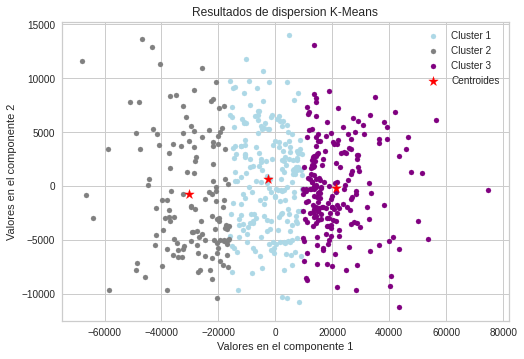

In [ ]:
#realizamos el grafico de dispersion de K-means, donde vemos un grupo diferente llamados cluster 1, 2 y 3.

plt.scatter(data_clean1[ydata_kmeans == 0, 0], data_clean1[ydata_kmeans == 0, 1], s = 100, marker= '.', c = "lightblue", label = "Cluster 1")
plt.scatter(data_clean1[ydata_kmeans == 1, 0], data_clean1[ydata_kmeans == 1, 1], s = 100, marker= '.', c = "gray", label = "Cluster 2")
plt.scatter(data_clean1[ydata_kmeans == 2, 0], data_clean1[ydata_kmeans == 2, 1], s = 100, marker= '.', c = "purple", label = "Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, marker= '*', c = "red", label = "Centroides")
plt.title("Resultados de dispersion K-Means")
plt.xlabel("Valores en el componente 1")
plt.ylabel("Valores en el componente 2")
plt.legend()
plt.show()

In [ ]:
# Usamos una de la métricas de evaluación de agrupamiento más utilizada, 
# el coeficiente de silhouette realizando la comparación de la distancia
# Importamos las bibliotecas
from sklearn import metrics
from sklearn.metrics import silhouette_score

s_score = silhouette_score(data_clean1, labelsdata, metric='euclidean')
print(f'El coeficiente de silueta es de {s_score}.')

El coeficiente de silueta es de 0.44145106059944467.


In [ ]:
# Generamos los scores con ayuda de scikit-learn
Silueta = metrics.silhouette_score(data_clean1, labelsdata)
Calinski_Harabasz = metrics.calinski_harabasz_score(data_clean1, labelsdata)
Davies_Bouldin = metrics.davies_bouldin_score(data_clean1, labelsdata)

In [ ]:
# Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)

Score Analísis de silueta:  0.44145106059944467
Score indice Calinski-Harabasz :  931.189363816278
Score indice Davies-Bouldin:  0.7170518658773272


Un mayor número de datos puede no proporcionar un mejor puntaje de análisis de silueta. Esto se debe a que el análisis de silueta se basa en la similitud de los datos dentro de un grupo y la diferencia entre los grupos adyacentes, por lo que un mayor número de datos no necesariamente mejorará el ajuste.